# Tutorial 01

In [26]:
# Importing packages
import numpy as np  # Numerical package (mainly multi-dimensional arrays and linear algebra)
import pandas as pd  # A package for working with data frames
import matplotlib.pyplot as plt  # A plotting package

## Setup matplotlib to output figures into the notebook
## - To make the figures interactive (zoomable, tooltip, etc.) use ""%matplotlib notebook" instead
%matplotlib notebook

plt.rcParams['figure.figsize'] = (5.0, 5.0)  # Set default plot's sizes
plt.rcParams['figure.dpi'] =120  # Set default plot's dpi (increase fonts' size)
plt.rcParams['axes.grid'] = True  # Show grid by default in figures

from IPython.core.display import display, HTML, Markdown

## Toy Model: The 🍕 Pizza & Pancakes 🥞 Drive-Thru

| $$X$$ 🍕 \ $$Y$$ 🥞 |  0   |  1   |  2   |  3   |
| ------------------- | ---- | ---- | ---- | ---- |
|          0          | 0    | 0.15 | 0.2  | 0.05 |
|          1          | 0.08 | 0.03 | ???  | 0.04 |
|          2          | 0.02 | 0.03 | 0.04 | 0.01 |
|          3          | 0.1  | 0.05 | 0.05 | 0.1  |

In [55]:
## P_{X,Y} joint distribution
## --------------------------
x_values = y_values = np.array([0, 1, 2, 3])
p_xy = pd.DataFrame([[0,    0.15, 0.2,    0.05],
                     [0.08, 0.03, np.nan, 0.04],
                     [0.02, 0.03, 0.04,   0.01],
                     [0.1,  0.05, 0.05,   0.1 ]],
                     index=[0, 1, 2, 3],
                     columns=[0, 1, 2, 3])
p_xy

,0,1,2,3
0,0.00,0.15,0.20,0.05
1,0.08,0.03,NaN,0.04
2,0.02,0.03,0.04,0.01
3,0.10,0.05,0.05,0.10


### Ex. 1.2a

Calcualting $p_{X,Y}\left(1,2\right)$

In [56]:
p_xy.loc[1, 2] = 1 - np.nansum(p_xy)
display(Markdown('$p_{{X,Y}}\\left(1,2\\right)={:.3}$'.format(p_xy.loc[1, 2])))

p_xy.loc[1, 2] = p_xy_1_2

display(Markdown('$p_{{X,Y}}$:'))
display(HTML(p_xy.to_html()))

$p_{X,Y}\left(1,2\right)=0.05$

$p_{{X,Y}}$:

,0,1,2,3
0,0.00,0.15,0.20,0.05
1,0.08,0.03,0.05,0.04
2,0.02,0.03,0.04,0.01
3,0.10,0.05,0.05,0.10


### Ex 1.2b
Calculating $p_{X\lvert Y}\left(1\lvert Y=0\right)$

In [59]:
p_x_given_y_1_0 = p_xy.loc[1, 0] / p_xy.loc[:, 0].sum()
display(Markdown('$p_{{X\lvert Y}}\\left(1\lvert Y=0\\right)={:.3}$'.format(p_x_given_y_1_0)))

$p_{X\lvert Y}\left(1\lvert Y=0\right)=0.4$

### Ex 1.2c

Calcualting $p_X\left(x\right)$

In [106]:
p_x = p_xy.sum(axis=1)
display(Markdown('$p_{{X}}\\left(x\\right)$:'))
display(HTML(p_x.to_frame().to_html()))

$p_{{X}}\left(x\right)$:

,0
0,0.4
1,0.2
2,0.1
3,0.3


Calculating $Pr\left(X_1+X_2=3\right)$

In [107]:
prob3 = np.sum([px[x1] * px[3 - x1] for x1 in range(4)])
display(Markdown('$Pr\\left(X_1+X_2=3\\right)={:.3}$'.format(prob3)))

$Pr\left(X_1+X_2=3\right)=0.28$

### Ex 1.3

In [108]:
## Import the normal distribution model from SciPy
from scipy.stats import norm

length_grid = np.arange(3.5, 5.3, 0.01)
sigma = 0.2
pl_given_x = [norm(4 + 0.2 * x, sigma) for x in x_grid]

#### Plotting

<IPython.core.display.Javascript object>


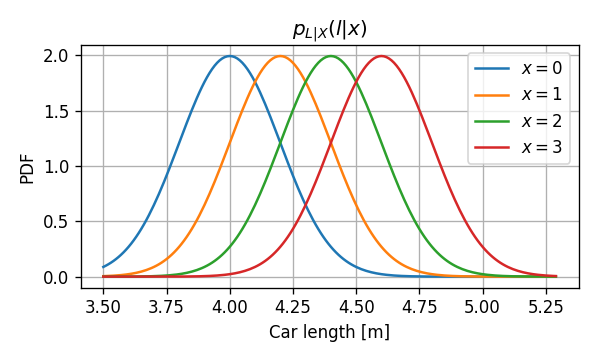

In [109]:
fig, ax = plt.subplots(figsize=(5, 3))
ax.set_title('$p_{L|X}\\left(l|x\\right)$')
for x in p_x.index:
    ax.plot(length_grid, pl_given_x[x].pdf(length_grid), label='$x={}$'.format(x));
ax.set_xlabel('Car length [m]')
ax.set_ylabel('PDF');
ax.legend()
plt.tight_layout()

<IPython.core.display.Javascript object>


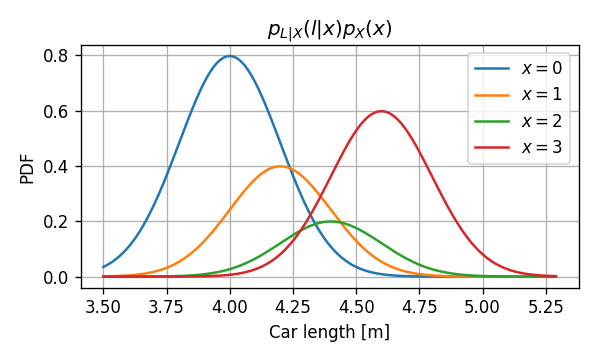

In [111]:
fig, ax = plt.subplots(figsize=(5, 3))
ax.set_title('$p_{L|X}\\left(l|x\\right)p_X\\left(x\\right)$')
for x in  p_x.index:
    ax.plot(length_grid, pl_given_x[x].pdf(length_grid) * p_x[x], label='$x={}$'.format(x));
ax.set_xlabel('Car length [m]')
ax.set_ylabel('PDF');
ax.legend()
plt.tight_layout()

Calculating:

$p_{X,L}\left(x,4.4\right)=p_{L|X}\left(4.4|x\right)p_X\left(x\right)$

In [125]:
p_x_l0 = pd.Series([pl_given_x[x].pdf(4.4) for x in p_x.index], index=p_x.index) * p_x
display(Markdown('$p_{{X|L}}\\left(x,0.44\\right)$:'))
display(HTML(p_x_l0.to_frame().to_html()))

$p_{{X|L}}\left(x,0.44\right)$:

,0
0,0.107982
1,0.241971
2,0.199471
3,0.362956


Calculating:

$p_{X|L}\left(x|L=4.4\right)$

In [127]:
px_given_l0 = p_x_l0 / p_x_l0.sum()
display(Markdown('$p_{X|L}\\left(x|L=4.4\\right)$:'))
display(HTML(px_given_l0.to_frame().to_html()))

$p_{X|L}\left(x|L=4.4\right)$:

,0
0,0.118352
1,0.265208
2,0.218627
3,0.397812


### Ex 1.3

Calcualting $\mathbb{E}\left[X|L=4.4\right]$

In [137]:
x_hat_l2 = (px_given_l0 * p_x.index).sum()
display(Markdown('$\hat{{x}}^*_\\left(l_2\\right)={:.4}$'.format(x_hat_l2)))

$\hat{x}^*_\left(l_2\right)=1.896$

### Extra

<IPython.core.display.Javascript object>


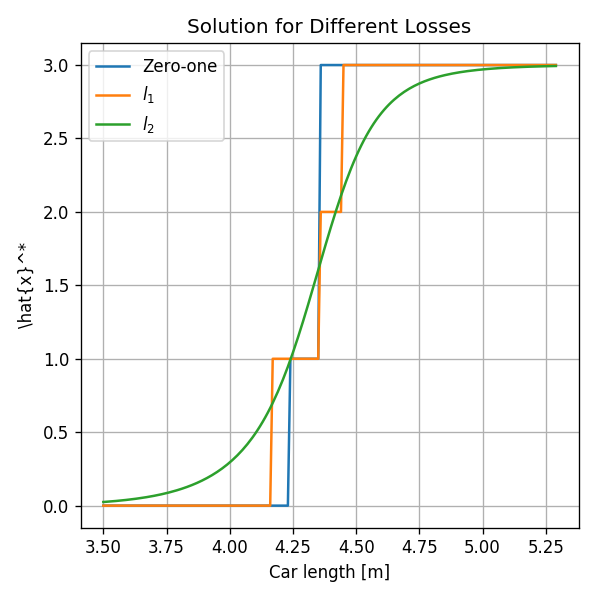

In [141]:
p_xl = np.array([pl_given_x[x].pdf(length_grid) * px[x] for x in x_grid])
p_x_given_l = p_xl / p_xl.sum(axis=0, keepdims=True)

fig, ax = plt.subplots(figsize=(5, 5))
ax.set_title('Solution for Different Losses')

ax.plot(length_grid, px_given_l.argmax(axis=0), label='Zero-one');
ax.plot(length_grid, (px_given_l.cumsum(axis=0) > 0.5).argmax(axis=0), label='$l_1$');
ax.plot(length_grid, (x_grid[:, None] * px_given_l).sum(axis=0), label='$l_2$');

ax.set_xlabel('Car length [m]')
ax.set_ylabel('\hat{x}^*');
ax.legend()
plt.tight_layout()